# Tutorial for running the human connectome through Eirene.

## Day 2

### First we load in packages to the environment

In [1]:
## Load packages

using Pkg
using JLD
using Eirene
using Combinatorics
using SparseArrays
using Plots
using MAT
using Statistics


function createSimplexLists(incidenceMatrix,simplex_named_list)
    
    # Will make lists of edges, 2-simplices, and 3-simplices
    edge_list = Any[]
    simp2_list = Any[]
    simp3_list = Any[]
    
    for (index,simplex_name) in enumerate(simplex_named_list)

        indices_of_simplex_nodes = findall(incidenceMatrix[index,:].>0)

        edges_from_simplex = collect(combinations(indices_of_simplex_nodes,2))
        simp2_from_simplex = collect(combinations(indices_of_simplex_nodes,3))
        simp3_from_simplex = collect(combinations(indices_of_simplex_nodes,4))
    

        for (index2,edge) in enumerate(edges_from_simplex)
            push!(edge_list,edge)
        end
        for (index2,simp2) in enumerate(simp2_from_simplex)
            push!(simp2_list,simp2)
        end
        for (index2,simp3) in enumerate(simp3_from_simplex)
            push!(simp3_list,simp3)
        end
    end
    edge_list = unique(edge_list)
    simp2_list = unique(simp2_list)
    simp3_list = unique(simp3_list)
    
    
    
    return edge_list, simp2_list, simp3_list
end


function createCellList(nNodes,edgeList,keepTriangles)
    n2Simps = length(keepTriangles)
    nEdges = length(edgeList)
    #E = Array{Array{Float64}}((Int(nNodes+nEdges+n2Simps)),1)
    E = Array{Array{Float64,1},1}(undef,Int(nNodes+nEdges+n2Simps))
    nCells = length(E)
    for a0 in collect(1:nCells)

        if a0 <= nNodes
            E[a0] = [a0]
        elseif a0 > (nNodes) && a0<=(nNodes+nEdges)
            E[a0] = edgeList[a0-nNodes]
        else
            E[a0] = keepTriangles[a0-(nNodes+nEdges)]

        end

    end
    E
end
        
function createDMatrix(E,nNodes,nEdges)
    D_01 = Int.(issubset.(E[1:nNodes],E[(nNodes+1):(nNodes+nEdges)]'))
    D_12 = Int.(issubset.(E[(nNodes+1):(nNodes+nEdges)],E[(nNodes+nEdges+1):length(E)]'))
    D = zeros(length(E),length(E))
    D[1:nNodes,(nNodes+1):(nNodes+nEdges)] = D_01
    D[(nNodes+1):(nNodes+nEdges),(nNodes+nEdges+1):length(E)] = D_12
    D = sparse(D)
end
        
function determineCellWeight(cell)
    cellWeight = maximum(node_weights[Int.(cell)])
end

        
function bettiCurveFromBarcode(barcode1,nSteps,weights,rev)

    bettiCurve = zeros(nSteps+1,1)
    ordered_weights = sort(unique(weights))
    if rev == true
        ordered_weights = reverse(ordered_weights)
    end
    for bar in collect(1:size(barcode1)[1])
        birth_index = Int(findall(ordered_weights.==barcode1[bar,1])[1])

        if barcode1[bar,2]>maximum(ordered_weights)

            bettiCurve[birth_index:Int(nSteps+1),1] = bettiCurve[birth_index:Int(nSteps+1),1] .+1
        else

            death_index = Int(findall(ordered_weights.==barcode1[bar,2])[1])
            bettiCurve[birth_index:death_index,1] = bettiCurve[birth_index:death_index,1].+1

        end
    end

    return bettiCurve
end
        
            
function plotBarcode(barcode,nSteps)

    nSteps = Int(nSteps)
    pbar = plot(1:2,zeros(2,1),c=:black)

    barcode_sorted = barcode[sortperm(barcode[:,1]),:]
    nbars = size(barcode)[1]


    for bar_index in collect(1:nbars)
        birth = barcode[bar_index,1]
        death = barcode[bar_index,2]
        if death>nSteps
            death = nSteps+1
        end

        plot!([birth, death],[bar_index, bar_index],c=:blue, legend = false,
                            xlim = (0,nSteps))
    end


    return pbar
end
            
function plotPersistenceDiagram(barcode1, nSteps, weights, rev)
    
    ordered_weights = sort(unique(weights))
    if rev == true
        ordered_weights = reverse(ordered_weights)
    end
                
    h = plot(0:maximum(weights), 0:maximum(weights), palette = :grays)
    for bar in collect(1:size(barcode1)[1])
        birth_index = Int(findall(ordered_weights.==barcode1[bar,1])[1])

        if barcode1[bar,2]>maximum(ordered_weights)
            
            scatter!([birth_index],[length(ordered_weights)], xlim = (0,1000),
                                    ylim = (0,1000), aspect_ratio = :equal, legend = false)

            #bettiCurve[birth_index:Int(nSteps+1),1] = bettiCurve[birth_index:Int(nSteps+1),1] .+1
        else

            death_index = Int(findall(ordered_weights.==barcode1[bar,2])[1])
            scatter!([birth_index],[death_index], xlim = (0,1000),
                                    ylim = (0,1000), aspect_ratio = :equal, legend = false)
        end
    end
                    
    return h
end

┌ Info: Recompiling stale cache file /Users/annblevins/.julia/compiled/v1.1/Eirene/mCiG1.ji for Eirene [9c0f25c4-2ca1-5870-89f6-52640788da1d]
└ @ Base loading.jl:1184
┌ Warning: Package Eirene does not have Pkg in its dependencies:
│ - If you have Eirene checked out for development and have
│   added Pkg as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Eirene
└ Loading Pkg into Eirene from project dependency, future warnings for Eirene are suppressed.


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-13308067614626903195\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5610482358391198763\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/11ce5d9967a4d08b86499eb09ff9ef7bb69327fe-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-13308067614626903195\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

plotPersistenceDiagram (generic function with 1 method)

### Next load in the brain data. 

We are loading here the 83x83 node matrices describing the white matter connectivity of 8 individuals scanned in triplicate (https://complexsystemsupenn.com/codedata). Already a weighted matrix, we have to do very little to prepare this object for eirene.

In [2]:
## Load in individual matrices
matlab_dict = matread("Individual_brains.mat")
individual_brains = matlab_dict["all_mats"]

nBrains = size(individual_brains)[3]
nNodes = size(individual_brains)[1]

println("Loaded $nBrains connectivity matrices each with $nNodes brain regions.")


Loaded 24 connectivity matrices each with 83 brain regions.


## Peek at the data and average matrices

For our purposes, we will run just the average connectivity matrix through eirene. However, the code can be easily manipulated to run individual brains if desired.

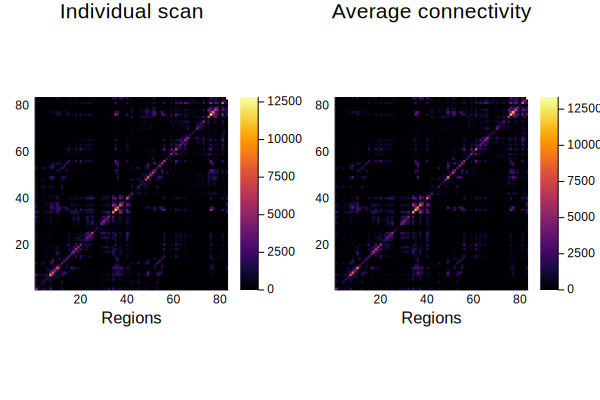

In [3]:
# Average connectivity matrices

average_brain = dropdims(mean(individual_brains, dims = 3), dims = 3)

# View an individual brain and the average
p1a = heatmap(individual_brains[:,:,1], aspect_ratio = :equal)
xlabel!("Regions")
title!("Individual scan")

p1b = heatmap(average_brain, aspect_ratio = :equal)
xlabel!("Regions")
title!("Average connectivity")
plot(p1a,p1b,layout = (1,2))


## Run Eirene! 

We pass our average matrix directly to eirene! Note, eirene constructs the filtration form -inf to +inf. So since we want ours to run from the highest weighted edges to the lowest, we will negate our matrix.

In [4]:
C = eirene(-average_brain, model = "vr", maxdim=3)

println("Finished running persistent homology!")

Finished running persistent homology!


## Vlsualize outputs

### Barcodes and Betti curves
First we wil look at the barcode output which shows each persistent cavity as a bar. Then we will plot the Betti curves, which records the number of cavities alive at each filtration value

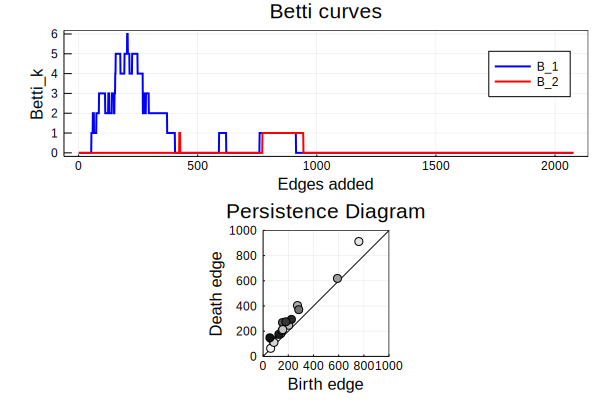

In [5]:
# Calculate Betti_1 from the barcode output
edge_weights = sort(unique(Iterators.flatten(average_brain)))
nEdgeWeights = length(edge_weights)
bettiCurve_1 = bettiCurveFromBarcode(-barcode(C,dim=1),
    nEdgeWeights,edge_weights,true)
bettiCurve_2 = bettiCurveFromBarcode(-barcode(C,dim=2),
    nEdgeWeights,edge_weights,true)




# Plot!
p2a = plot(1:(nEdgeWeights+1),bettiCurve_1, c=:blue, linewidth = 2, lab = "B_1")
plot!(1:(nEdgeWeights+1), bettiCurve_2, c=:red,linewidth = 2, lab = "B_2")
xlabel!("Edges added")
ylabel!("Betti_k")
title!("Betti curves")


p2b = plotPersistenceDiagram(-barcode(C,dim=1), nEdgeWeights, 
    edge_weights, true)
xlabel!("Birth edge")
ylabel!("Death edge")
title!("Persistence Diagram")

plot(p2a,p2b,layout = (2,1), framestyle = :box)